# Polynomial Regression

 **QUESTION**
 
 A person named Amlesh has given an interview for a job in your company say(N).
 
 He told that he worked as a Regional Manager in his previous company for 2 yrs(level 6.5).
 
 You as the hiring manager should validate, whether he is telling the truth.
 
 So from Glassdoor you take out the salary sheet of employees of Amlesh's previous company(say M) 
 
 Now, you have to determine, whether he is telling the truth or not.



# Importing the libraries

In [24]:
import numpy as np                                                        
import matplotlib.pyplot as plt
import pandas as pd 
import os
df=pd.read_csv("Position_Salaries.csv")        

In [25]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We can see that LABEL ENCODING is already done in the data set for the column POSITION,so we do not need to include it in **X**

In [26]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1:].values

In [27]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [28]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Splitting of data is NOT DONE, since the data set contains less number of observations

# Training the Linear Regression model on the whole dataset


1. First we will build the linear regression(y=mx+c) model with "Level" as independant and "SALARY" as dependant
2. Then we will implement the polynomial regression model

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising the Linear Regression results

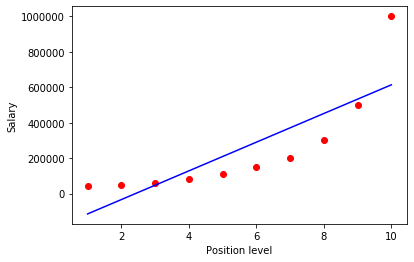

In [30]:
plt.scatter(X,y,color='red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
# we can see that the line is not best fitting the data 

# Training the Polynomial Regression model on the whole dataset

### Step 1: Creating the matrix of powered features

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_feautre = PolynomialFeatures(degree=4)
X_poly = poly_feautre.fit_transform(X)


In [32]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### Step 2: Training the model with X_poly

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising the Polynomial Regression results

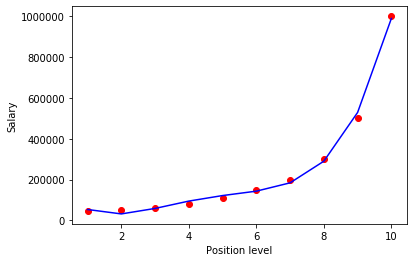

In [34]:
plt.scatter(X,y,color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
# ON INCREASING THE DEGREE, THE CURVE FITS THE DATA POINTS

# Predicting a new result with Linear Regression

In [35]:
lin_reg.predict([[6.5]])

array([[330378.78787879]])

# Predicting a new result with Polynomial Regression

In [36]:
k=poly_feautre.fit_transform([[6.5]])

In [37]:
k

array([[1.0000000e+00, 6.5000000e+00, 4.2250000e+01, 2.7462500e+02,
        1.7850625e+03]])

In [38]:
lin_reg_2.predict(k)

array([[158862.45265155]])